In [42]:
import numpy as np

In [44]:
import pandas as pd

In [46]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [50]:
dftit = pd.read_csv(r"C:\Users\DELL\Downloads\Titanic-Dataset.csv")

In [52]:
dftit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
dftit.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked" ], axis =1, inplace = True)

In [56]:
dftit

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [60]:
dftit["Family"]  = dftit["SibSp"] + dftit["Parch"]

In [62]:
dftit

,Survived,Pclass,Sex,Age,SibSp,Parch,Family
0,0,3,male,22.0,1,0,1
1,1,1,female,38.0,1,0,1
2,1,3,female,26.0,0,0,0
3,1,1,female,35.0,1,0,1
4,0,3,male,35.0,0,0,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,0
887,1,1,female,19.0,0,0,0
888,0,3,female,NaN,1,2,3
889,1,1,male,26.0,0,0,0


In [64]:
dftit.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [66]:
dftit

,Survived,Pclass,Sex,Age,Family
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
...,...,...,...,...,...
886,0,2,male,27.0,0
887,1,1,female,19.0,0
888,0,3,female,NaN,3
889,1,1,male,26.0,0


In [29]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
dtype: object

In [31]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

In [84]:
dftit["Age"].mean().round()

30.0

In [86]:
dftit["Age"] = dftit["Age"].fillna(dftit["Age"].mean().round())

In [88]:
dftit["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [90]:
dftit["Age"] = dftit["Age"].astype("int")

In [92]:
dftit["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [100]:
dftit["Sex"].unique()

array(['male', 'female'], dtype=object)

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
ohe = OneHotEncoder()

In [106]:
ohe

OneHotEncoder()

In [112]:
ohe.fit(dftit[["Sex"]])

OneHotEncoder()

In [116]:
ohe.transform(dftit[["Sex"]])

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [118]:
ohe.transform(dftit[["Sex"]]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [120]:
a= ohe.transform(dftit[["Sex"]]).toarray()

In [122]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [124]:
dfgen = pd.DataFrame(a, dtype = "int", columns = ['female', 'male'])

In [126]:
pd.concat([dftit, dfgen], axis = 1)

,Survived,Pclass,Sex,Age,Family,female,male
0,0,3,male,22,1,0,1
1,1,1,female,38,1,1,0
2,1,3,female,26,0,1,0
3,1,1,female,35,1,1,0
4,0,3,male,35,0,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,1
887,1,1,female,19,0,1,0
888,0,3,female,29,3,1,0
889,1,1,male,26,0,0,1


In [130]:
dftit = pd.concat([dftit, dfgen], axis = 1)

In [132]:
dftit

,Survived,Pclass,Sex,Age,Family,female,male
0,0,3,male,22,1,0,1
1,1,1,female,38,1,1,0
2,1,3,female,26,0,1,0
3,1,1,female,35,1,1,0
4,0,3,male,35,0,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,1
887,1,1,female,19,0,1,0
888,0,3,female,29,3,1,0
889,1,1,male,26,0,0,1


In [134]:
dftit.drop("Sex", axis = 1, inplace = True)

In [136]:
dftit

,Survived,Pclass,Age,Family,female,male
0,0,3,22,1,0,1
1,1,1,38,1,1,0
2,1,3,26,0,1,0
3,1,1,35,1,1,0
4,0,3,35,0,0,1
...,...,...,...,...,...,...
886,0,2,27,0,0,1
887,1,1,19,0,1,0
888,0,3,29,3,1,0
889,1,1,26,0,0,1


In [140]:
dftit.dtypes

Survived    int64
Pclass      int64
Age         int32
Family      int64
female      int32
male        int32
dtype: object

In [142]:
dftit.isna().sum()

Survived    0
Pclass      0
Age         0
Family      0
female      0
male        0
dtype: int64

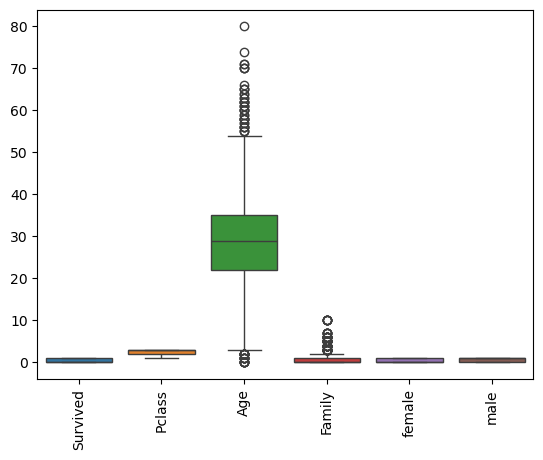

In [146]:
sns.boxplot(dftit)
plt.xticks(rotation = 90)
plt.show()

In [150]:
dftit.columns

Index(['Survived', 'Pclass', 'Age', 'Family', 'female', 'male'], dtype='object')

In [152]:
cols = ['Age', 'Family']

In [154]:
cols

['Age', 'Family']

In [156]:
for c in cols:
    print(c)

Age
Family


In [160]:
for c in cols:
    print(dftit[c])

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32
0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64


In [182]:
for c in cols :
    sk = dftit[c].skew().round()
    if sk ==0 or sk == -0:
        print(c, " : Normal Distribution")
    else: 
        print(c, ": Skewed Distribution")

Age  : Normal Distribution
Family : Skewed Distribution


In [184]:
for c in cols :
    sk = dftit[c].skew().round()
    if sk ==0 or sk == -0:
        m = dftit[c].mean()
        s = dftit[c].std()
        lowerlimit = m - 3*s
        upperlimit = m + 3*s
        dftit[c] = dftit[c].map(lambda x : lowerlimit if x < lowerlimit else upperlimit if x > upperlimit else x)
    else: 
        q1 = dftit[c].quantile(0.25)
        q3 = dftit[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        dftit[c] = dftit[c].map(lambda x : lower if x < lower else upper if x > upper else x)   

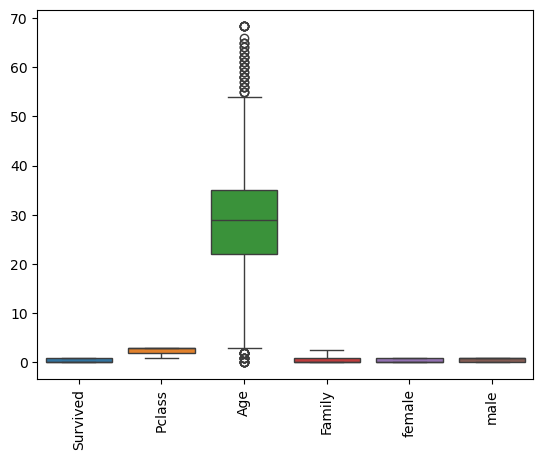

In [186]:
sns.boxplot(dftit)
plt.xticks(rotation = 90)
plt.show()

In [188]:
dftit[(dftit[c] < lower) | (dftit[c] > upper)].count()

Survived    0
Pclass      0
Age         0
Family      0
female      0
male        0
dtype: int64

<Axes: xlabel='Survived'>

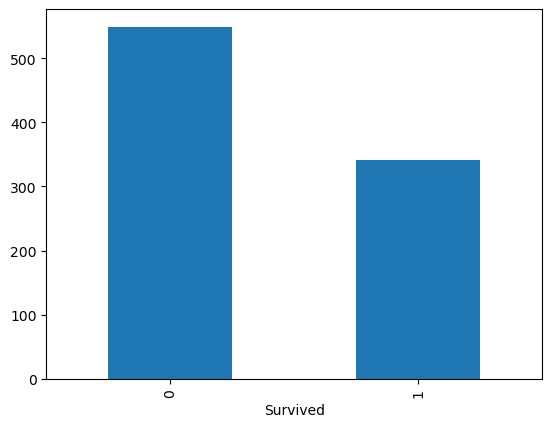

In [190]:
dftit["Survived"].value_counts().plot(kind = "bar")

In [192]:
from imblearn.over_sampling import RandomOverSampler

In [194]:
ros = RandomOverSampler()

In [196]:
ros

RandomOverSampler()

In [198]:
x = dftit.drop("Survived", axis = 1)

In [200]:
x

,Pclass,Age,Family,female,male
0,3,22.0,1.0,0,1
1,1,38.0,1.0,1,0
2,3,26.0,0.0,1,0
3,1,35.0,1.0,1,0
4,3,35.0,0.0,0,1
...,...,...,...,...,...
886,2,27.0,0.0,0,1
887,1,19.0,0.0,1,0
888,3,29.0,2.5,1,0
889,1,26.0,0.0,0,1


In [202]:
y = dftit["Survived"]

In [204]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [206]:
x_ros , y_ros = ros.fit_resample(x,y)

In [208]:
x.shape, x_ros.shape, y.shape, y_ros.shape

((891, 5), (1098, 5), (891,), (1098,))

In [210]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [212]:
y_ros.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

<Axes: xlabel='Survived'>

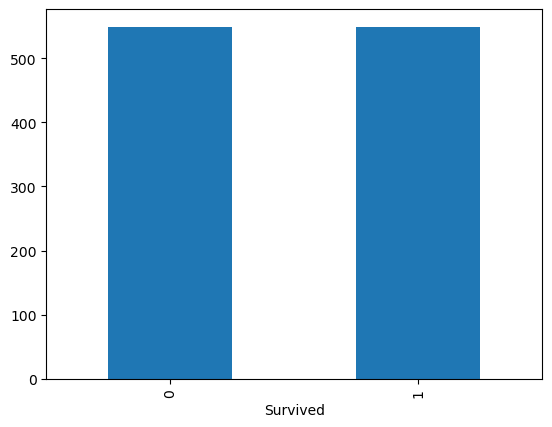

In [214]:
y_ros.value_counts().plot(kind = "bar")

In [216]:
from sklearn.model_selection import train_test_split

In [218]:
x_train, x_test,y_train, y_test = train_test_split(x_ros,y_ros,test_size = 0.20, random_state = 2)

In [222]:
x_ros.shape, x_train.shape, x_test.shape

((1098, 5), (878, 5), (220, 5))

In [224]:
y_ros.shape, y_train.shape, y_test.shape

((1098,), (878,), (220,))

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [228]:
knn = KNeighborsClassifier()

In [230]:
sv_model = SVC()

In [232]:
dtree = DecisionTreeClassifier()

In [234]:
models = [knn , sv_model, dtree ]

In [236]:
models

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [238]:
for m in models:
    m.fit(x_train,y_train)
    sc = m.score(x_test, y_test)
    print(m, end = "==>")
    print(sc)

KNeighborsClassifier()==>0.7863636363636364
SVC()==>0.7
DecisionTreeClassifier()==>0.8409090909090909


In [244]:
from sklearn.linear_model import LogisticRegression

In [246]:
lr = LogisticRegression()

In [248]:
lr

LogisticRegression()

In [250]:
lr.fit(x_train, y_train)

LogisticRegression()

In [252]:
lr.score(x_test, y_test)

0.7909090909090909